# "Concevez une application au service de la santé publique"
_Analysis Notebook_

In [1]:
# Checking whether the notebook is on Colab or PC

import sys
is_colab = 'google.colab' in sys.modules
is_colab, sys.executable

(True, '/usr/bin/python3')

In [2]:
# Mounting myDrive if on colab

if is_colab==True:
    from google.colab import files, output, drive
    drive.mount('/gdrive')
    %cd /gdrive
    print("You're on Google Colab")
else:
    print("You're on a PC")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive
You're on Google Colab


In [0]:
import os
if os.getcwd()!='/gdrive/My Drive/--DATA SCIENCE/PROJET3':
    os.chdir('My Drive/--DATA SCIENCE/PROJET3')

In [0]:
# Noticing user about files that has to be in the current working directory

def file_required(file_name):
    if os.path.exists(os.getcwd()+"/"+file_name):
        print("OK, loading "+file_name+"\
                           from the current working directory ...")
    else:
        print("Please, put "+file_name+"\
                           in the current working directory")

In [5]:
# Installations and importations required for Google Colab version
# May need to reboot the environment

if is_colab==True:
    !pip install -r "requirements.txt"
    !pip install ppscore
    !pip install simplejson
    !pip install mlxtend==0.17.2
    !pip install gTTS
else:
    # make sure 'requirements.txt' is in the current working directory
    file_required('requirements_analysis.txt')
    !pip install -r requirements_analysis.txt

     |████████████████████████████████| 849kB 5.0MB/s 
     |████████████████████████████████| 92kB 7.7MB/s 
  Created wheel for gTTS-token: filename=gTTS_token-1.1.3-cp36-none-any.whl size=4097 sha256=adab0b8e2260f9bd1fa410ff8240d736f19b0346e22205c52bda3f602d21cb44
  Stored in directory: /root/.cache/pip/wheels/dd/11/61/33f7e51bf545e910552b2255eead2a7cd8ef54064b46dceb34
  Created wheel for simplejson: filename=simplejson-3.17.0-cp36-cp36m-linux_x86_64.whl size=114208 sha256=c3a63909d0c2aacb377a53e4e9a2abc83d44398a67ccf435c6c1aa5f96aae259
  Stored in directory: /root/.cache/pip/wheels/86/c0/83/dcd0339abb2640544bb8e0938aab2d069cef55e5647ce6e097
Successfully built gTTS-token simplejson
  Created wheel for ppscore: filename=ppscore-0.0.2-py2.py3-none-any.whl size=9629 sha256=d16b6ac1b1023a55359cdf8434e573fe6963d69afdbc8adf0820ec7298ea2825
  Stored in directory: /root/.cache/pip/wheels/29/32/a2/82782fc09f5cd68e401ff047201d38af8965fb94984db18aa5
Successfully built ppscore
     |████████████

In [6]:
import os
import io
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import simplejson as json
import missingno as msno
import ppscore as pps
import warnings
warnings.filterwarnings('ignore')

import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, train_test_split
# from sklearn import metrics
from sklearn.impute import KNNImputer
# from sklearn.dummy import DummyRegressor, DummyClassifier
# from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from statsmodels.graphics.gofplots import qqplot

from statsmodels.tsa.stattools import kpss, adfuller

plt.rcParams['figure.facecolor']='w'

# To play audio text-to-speech during execution
from IPython.display import Audio
from gtts import gTTS

def speak(text, lang='en'):
    with io.BytesIO() as f:
        gTTS(text=text, lang=lang).write_to_fp(f)
        f.seek(0)
        return Audio(f.read(), autoplay=True)

# Get list of dtype from json
f = open('d_types.json', 'r')
d_types = json.loads(f.read().replace('datetime64', 'object'))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Import cleaned dataset

df = pd.read_csv('OFF_Cleaned.csv',
                 index_col='Unnamed: 0', dtype=d_types,
                 low_memory=False, encoding ='utf-8')
df['created_datetime'] = pd.to_datetime(df['created_datetime'])

## 0 Preliminaries

Let's print the main infos on the dataframe as a guideline for further exploration.

In [0]:
# def print_null_pct(df):
#     tot_null = df.isna().sum().sum()
#     print('nb of null: ', tot_null, '\npct of null: ',
#         '{:.1f}'.format(tot_null*100/(df.shape[0]*df.shape[1])))

In [0]:
# print(df.shape)
# print_null_pct(df) #(563352, 45) nb of null:  4562871 pct of null:  18.0

In [0]:
# # Checking columns in df

# for i, c in enumerate(df.columns):
#     print('\n'+c if i % 6 == 0 else c, end=' | ')

In [0]:
# df.info()

In [0]:
# # Displaying number of missing values per column

# def plot_export_missing(df, cols, n_file, title,
#                         shorten_label=False, figsize=(12,8)):
#     with plt.style.context('default'):
#         fig, axs = plt.subplots(2,1)
#         msno.matrix(df[cols] , sparkline=False,
#                     fontsize=11, ax=axs[0])
#         msno.bar(df[cols], ax=axs[1], fontsize=11)
#         if shorten_label:
#             for ax in axs:
#                 lab = [item.get_text() for item in ax.get_xticklabels()]
#                 short_lab = [s[:7]+'...'+s[-7:] if len(s)>14 else s for s in lab]
#                 ax.axes.set_xticklabels(short_lab)
#     fig.set_size_inches(figsize)
#     [ax.grid() for ax in axs.flatten()];
#     [sns.despine(ax=ax, right=False, left=False,top=False, bottom=False)\
#                                         for ax in axs.flatten()];
#     plt.subplots_adjust(hspace=0.3)
#     plt.tight_layout(rect=[0, 0.05, 1, 0.92])
#     fig.suptitle(title, fontweight='bold', fontsize=14)
#     if not os.path.exists(os.getcwd()+'/FIG'):
#         os.makedirs('FIG')
#     plt.savefig(os.getcwd()+'/FIG/'+n_file, dpi=400);
#     plt.show()

In [0]:
# Temporary (already changed in P3_Cleaning)
df['additives_n'] = df['additives_n'].clip(0,20)
# Temporary (not changed yet)
df['additives_n'] = df['additives_n'].clip(0,20)
# df['proteins_100g'] = df['additives_n'].where

In [0]:
# plot_export_missing(df, df.columns, 'A_0_missing_vals.png',
#                     'Overview of missing data',
#                      shorten_label=True)

To help exploration, we'll split the data in groups. For more details about these groups, see the paragraph 6 (imputations) of P3_Cleaning notebook.

'C' indicate categorical columns and 'Q' quantitative columns. Columns name including 1 to 3 are without missing data whereas columns 4 may contain NaN and will have to be explored as subsets.

In [0]:
# Splitting columns in categories

info_cols =  ['code','code_val','url','creator','created_datetime',
              'product_name', 'ingredients_text']
cols_1_Q = ['nutriscore','fat_100g','carbohydrates_100g','proteins_100g',
            'salt_100g','saturated_fat_100g', 'sugars_100g', 'sodium_100g',
            'energy_kj_100g','energy_from_fat_kj_100g']
cols_1_C = ['nutrigrade', 'countries_main', 'categories_main']
cols_1_C_ = ['countries_tuple', 'categories_tuple']

cols_2_Q = ['fiber_100g']
cols_2_C = ['nova_group', 'pnns1', 'pnns2', 'main_category']
cols_2_C_ = []

cols_3_Q = ['ing_from_palm_oil_n','additives_n']
cols_3_C = ['additives_main','labels_main','allergens_main', 'traces_main']
cols_3_C_ = ['additives_tuple','labels_tuple','allergens_tuple', 'traces_tuple']

cols_4_Q = ['quantity_num', 'serving_quantity']
cols_4_C = ['brands_main','packaging_main', 'quantity_type','quantity_unit']
cols_4_C_ = ['brands_tuple','packaging_tuple']

qual_cols = cols_1_C + cols_2_C + cols_3_C + cols_4_C
quant_cols = cols_1_Q + cols_2_Q + cols_3_Q + cols_4_Q

## 1 Univariate analysis

### 1.1 Quantitative data

Let's plot the histograms of quantitative data, as well as the mean, median and the mode.

#### Histograms

We notice that:
- most of the distributions have a peak at or around zero. This can't completely be dismissed as an accumulation of wrong values as some products really contain zero fats or sugar or carbohydrates
- none of the distributions seems to be normal
- most distribution are positively skewed except nutriscore
- nutriscore has a bimodal distribution

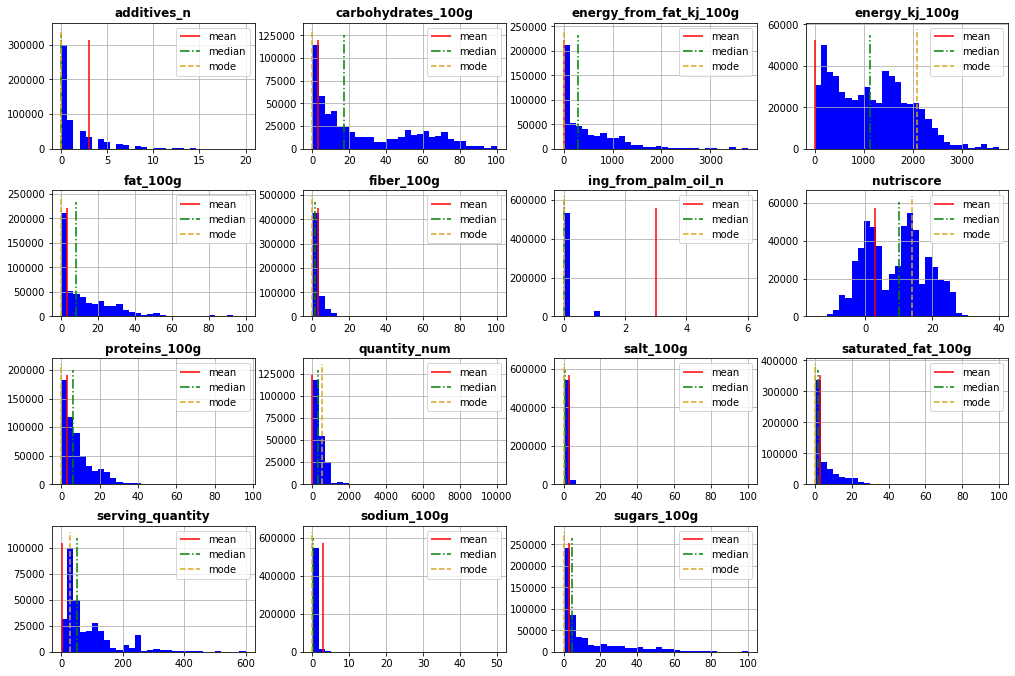

In [16]:
# Plotting histograms of the main quantitative continuous columns

fig = df[quant_cols].hist(figsize=(18,6), bins=30, color='b',
                        xlabelsize=10, ylabelsize=10);

for ax, c in zip(fig.ravel(), sorted(quant_cols)):
    ax.vlines(3, *ax.get_ylim(),  color='red', ls='-', lw=1.5)
    ax.vlines(df[c].median(), *ax.get_ylim(), color='green', ls='-.', lw=1.5)
    ax.vlines(df[c].mode()[0], *ax.get_ylim(), color='goldenrod', ls='--', lw=1.5)
    ax.legend(['mean', 'median', 'mode'])
    
[ax.title.set_fontweight('bold') for ax in fig.ravel()];
plt.tight_layout(w_pad=1, h_pad=-0.8)
plt.gcf().set_size_inches(14,10)

# plt.savefig(os.getcwd()+'/FIG/'+'A_1_1_histograms.png', dpi=400);
plt.show()

#### Normality test

It seems from histograms that none of the data is normally distributed. 

Let's check with usual normality tests and visualize the qqplots (for normal distribution).

In [0]:
# Normality Tests

from scipy.stats import shapiro, normaltest, anderson

def normality_tests(data, print_opt=False):
    df_res = pd.DataFrame([])
    data_notna = data[data.notna()]
    # Shapiro-Wilk - D'Agostino's K^2
    for f_name, func in zip(['Shapiro-Wilk', "D'Agostino K^2"],[shapiro, normaltest]):
        stat, p = func(data_notna)
        df_res.loc[f_name,'stat'] = stat
        df_res.loc[f_name,'p_value'] = p
        if print_opt: print('---'+f_name) 
        if print_opt: print('stat=%.3f, p=%.3f' % (stat, p))
        df_res.loc[f_name,'res'] = [p > 0.05]
        if p > 0.05:
            if print_opt: print('Probably Gaussian')
        else:
            if print_opt: print('Probably not Gaussian')
    # Anderson-Darling
    result = anderson(data_notna)
    if print_opt: print('---'+'Anderson-Darling')
    df_res.loc['Anderson-Darling','stat'] = result.statistic
    if print_opt: print('stat=%.3f' % (result.statistic))
    res_and = [(int(result.significance_level[i]),result.statistic < res)\
                   for i,res in enumerate(result.critical_values)]
    df_res.loc['Anderson-Darling','res'] = str(res_and)
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            if print_opt: print('Probably Gaussian at the %.1f%% level' % (sl))
        else:
            if print_opt: print('Probably not Gaussian at the %.1f%% level' % (sl))
    return df_res

In [0]:
# Plotting histograms and qqplots of the main quantitative continuous columns

def plot_hist_qqplot(data, name, save=False):
    fig, axs = plt.subplots(1,2)
    # histogram
    axs[0].hist(data, color='b', bins =25);
    # using statsmodels qqplot's module
    qqplot(data, line='r', **{'markersize': 5, 'mec': 'b','color': 'None'}, ax=axs[1])
    plt.gcf().set_size_inches(10,2.5)
    fig.suptitle(name, fontweight='bold', size=14)
    plt.tight_layout(rect=[0, 0.05, 1, 0.92])

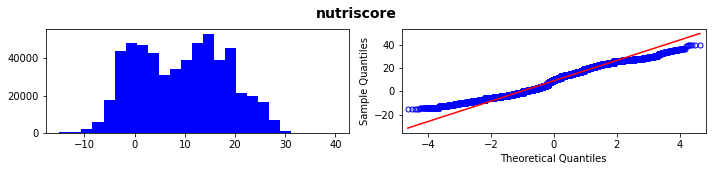

,stat,p_value,res
Shapiro-Wilk,0.976,0.000,False
D'Agostino K^2,"105,756.715",0.000,False
Anderson-Darling,"4,985.438",nan,"[(15, False), (10, False), (5, False), (2, Fal..."


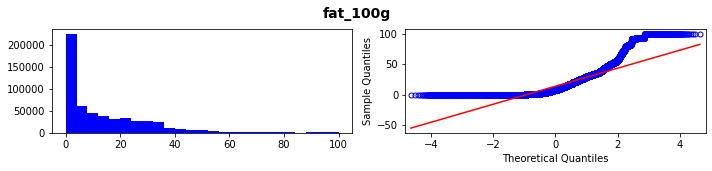

,stat,p_value,res
Shapiro-Wilk,0.793,0.000,False
D'Agostino K^2,"215,100.781",0.000,False
Anderson-Darling,"31,143.227",nan,"[(15, False), (10, False), (5, False), (2, Fal..."


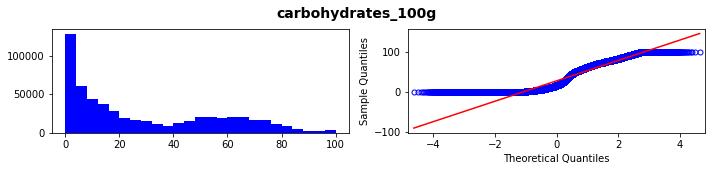

,stat,p_value,res
Shapiro-Wilk,0.873,0.000,False
D'Agostino K^2,"114,954.534",0.000,False
Anderson-Darling,"27,125.357",nan,"[(15, False), (10, False), (5, False), (2, Fal..."


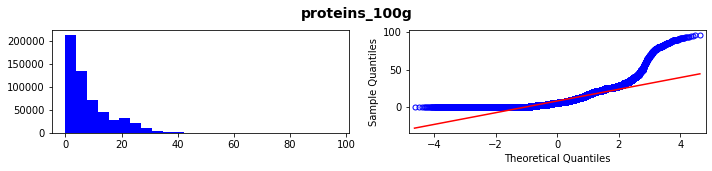

,stat,p_value,res
Shapiro-Wilk,0.823,0.000,False
D'Agostino K^2,"257,370.093",0.000,False
Anderson-Darling,"23,865.042",nan,"[(15, False), (10, False), (5, False), (2, Fal..."


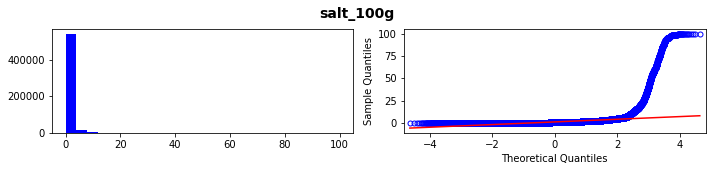

,stat,p_value,res
Shapiro-Wilk,0.236,0.000,False
D'Agostino K^2,"1,163,732.423",0.000,False
Anderson-Darling,"102,066.458",nan,"[(15, False), (10, False), (5, False), (2, Fal..."


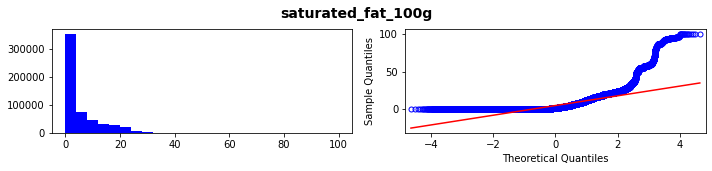

,stat,p_value,res
Shapiro-Wilk,0.691,0.000,False
D'Agostino K^2,"383,386.491",0.000,False
Anderson-Darling,"49,028.990",nan,"[(15, False), (10, False), (5, False), (2, Fal..."


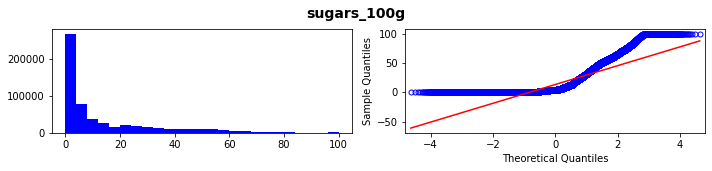

,stat,p_value,res
Shapiro-Wilk,0.735,0.000,False
D'Agostino K^2,"185,494.744",0.000,False
Anderson-Darling,"55,662.922",nan,"[(15, False), (10, False), (5, False), (2, Fal..."


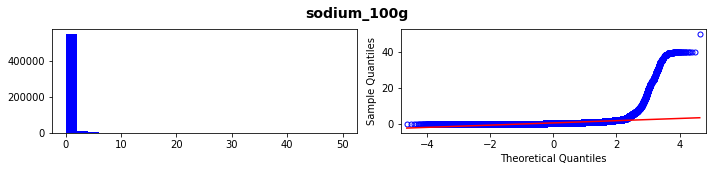

,stat,p_value,res
Shapiro-Wilk,0.227,0.000,False
D'Agostino K^2,"1,151,600.508",0.000,False
Anderson-Darling,"105,687.785",nan,"[(15, False), (10, False), (5, False), (2, Fal..."


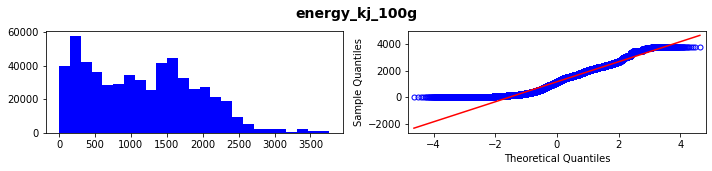

,stat,p_value,res
Shapiro-Wilk,0.960,0.000,False
D'Agostino K^2,"24,980.952",0.000,False
Anderson-Darling,"5,846.850",nan,"[(15, False), (10, False), (5, False), (2, Fal..."


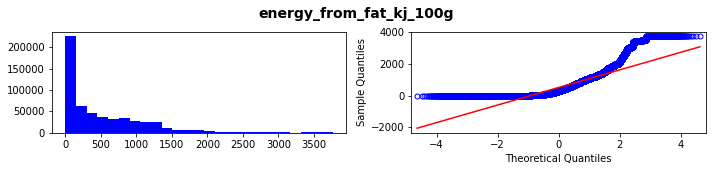

,stat,p_value,res
Shapiro-Wilk,0.793,0.000,False
D'Agostino K^2,"215,100.780",0.000,False
Anderson-Darling,"31,143.227",nan,"[(15, False), (10, False), (5, False), (2, Fal..."


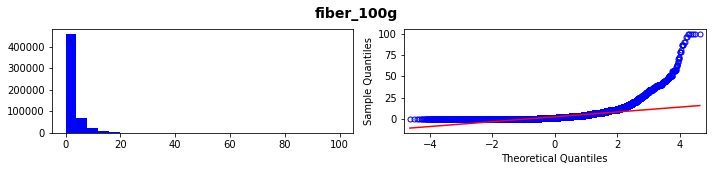

,stat,p_value,res
Shapiro-Wilk,0.659,0.000,False
D'Agostino K^2,"522,935.162",0.000,False
Anderson-Darling,"43,316.600",nan,"[(15, False), (10, False), (5, False), (2, Fal..."


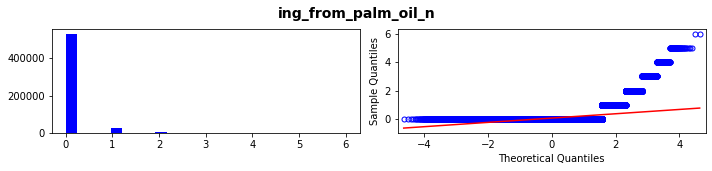

,stat,p_value,res
Shapiro-Wilk,0.231,0.000,False
D'Agostino K^2,"613,344.830",0.000,False
Anderson-Darling,"192,518.391",nan,"[(15, False), (10, False), (5, False), (2, Fal..."


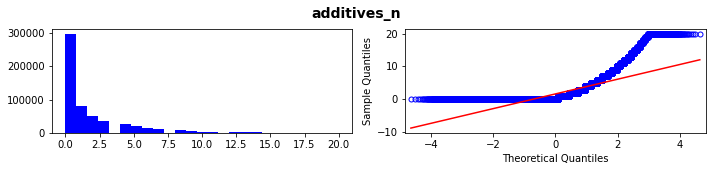

,stat,p_value,res
Shapiro-Wilk,0.659,0.000,False
D'Agostino K^2,"303,652.821",0.000,False
Anderson-Darling,"64,866.419",nan,"[(15, False), (10, False), (5, False), (2, Fal..."


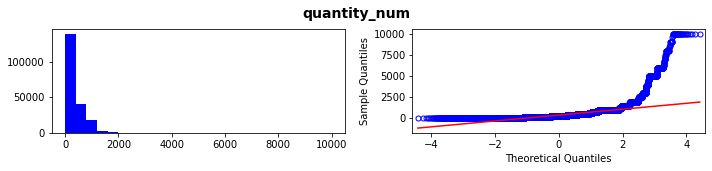

,stat,p_value,res
Shapiro-Wilk,0.574,0.000,False
D'Agostino K^2,"256,605.549",0.000,False
Anderson-Darling,"16,525.354",nan,"[(15, False), (10, False), (5, False), (2, Fal..."


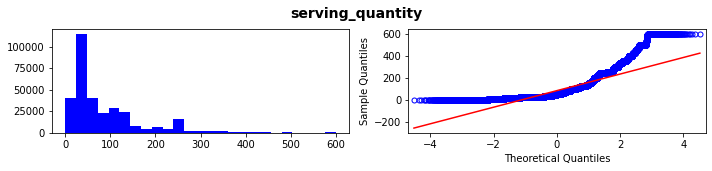

,stat,p_value,res
Shapiro-Wilk,0.768,0.000,False
D'Agostino K^2,"140,941.669",0.000,False
Anderson-Darling,"22,957.259",nan,"[(15, False), (10, False), (5, False), (2, Fal..."


In [41]:
# Plotting QQplots and normality tests stats

for i, c in enumerate(quant_cols,1):
    if c in cols_4_Q:
        plot_hist_qqplot(df[c].dropna().values, c, save=False)
    else:
        plot_hist_qqplot(df[c].values, c, save=False)
    # plt.savefig(os.getcwd()+'/FIG/'+'A_1_1_qqplot_'+c+'.png', dpi=400)
    plt.show()
    with pd.option_context('display.float_format', '{:,.3f}'.format):
        display(normality_tests(df[c], print_opt=False))

Without surprise data are far from normal distribution. We'll have to take this into account while hypothesis testing.

### 1.2 Qualitative data

Let's see how categorical data are distributed over categories.

For more clarity we plot only data of 15 most populated categories.

#### Bar plots

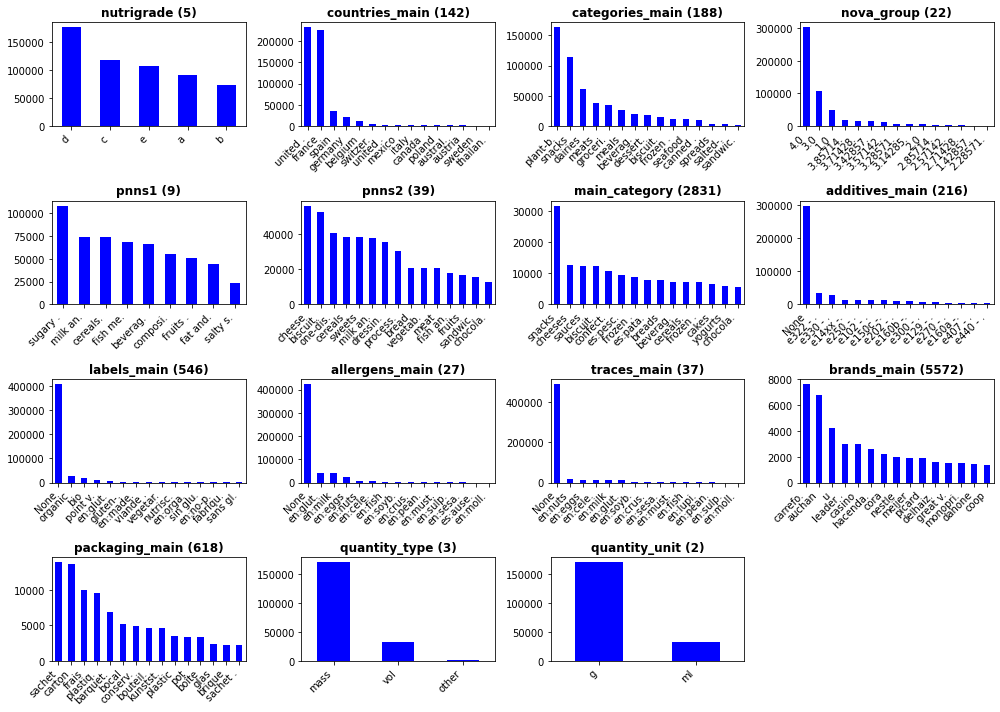

In [20]:
# Plotting bar plots of the main categorical columns

fig = plt.figure(figsize=(14,10))
for i, c in enumerate(qual_cols,1):
    ax = fig.add_subplot(4,4,i)
    ser = df[c].value_counts()
    n_cat = ser.shape[0]
    if n_cat>15:
        ser[0:15].plot.bar(color='b',ax=ax)
    else:
        ser.plot.bar(color='b',ax=ax)
    ax.set_title(c+f' ({n_cat})', fontweight='bold')
    labels = [item.get_text() for item in ax.get_xticklabels()]
    short_labels = [s[0:7]+'.' if len(s)>7 else s for s in labels]
    ax.axes.set_xticklabels(short_labels)
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# plt.savefig(os.getcwd()+'/FIG/'+'A_1_2_bar_plots.png', dpi=400);
plt.show()

Some features have lots of categories ('main category', 'brands_main', 'labels_main', 'packaging_main'), whereas others ('nutrigrade', 'nova_group', 'pnns1' 'pnns2' have less.

## 2 Time analysis

We'll define useful functions for time analysis of data presented below.

### 2.0 Functions

In [0]:
# Plotting proportion of categories among newly entered products and returning
# the dataframe of aggregated data for each categories

def plot_cat_prop_thr_time(col, palette='dark', ncol=3):
    
    fig = plt.figure(figsize=(10,5))
    gb = df.groupby(col)
    lab = gb.size().index
    # mean aggregation by month
    gb_week = df.groupby([pd.Grouper(key='created_datetime', freq='M'), col])
    cat_n_item_counts = gb_week.size().unstack()
    cat_n_item_prop = cat_n_item_counts\
         .div(cat_n_item_counts.sum(axis='columns').values/100, axis='rows')
    
    with sns.color_palette(palette):
        plt.stackplot(cat_n_item_prop.index, cat_n_item_prop.T.values,
                      alpha=0.8, labels=cat_n_item_prop.columns)

    ax = plt.gca()
    plt.legend(bbox_to_anchor=[0.9,-0.1], ncol=ncol)
    ax.set_xlabel("Time"), ax.set_ylabel("Category proportions (%)")
    ax.set_title("Proportion of each category among new items ("+col+")")
    plt.tight_layout(rect=[0, 0.05, 1, 1.2])
  
    return cat_n_item_prop

In [0]:
# Function calculating regression for each categories through time

def mult_reg_thr_time(df):
    data = df.dropna(how='any')
    dates = mdates.date2num(data.index)
    dates_rel = dates-dates.min()
    df_reg_prop = pd.DataFrame([])

    for c in df.columns:
        X = dates_rel
        y = data[c].values
        X, y = [arr.reshape(-1, 1) for arr in [X,y]]
        reg = LinearRegression()
        reg.fit(X,y)
        reg.score(X, y)
        df_reg_prop.loc['coef', c] = reg.coef_[0,0]
        df_reg_prop.loc['intercept',c] = reg.intercept_[0]
        df_reg_prop.loc['mean',c] = y.mean()
    return df_reg_prop

In [0]:
# Function applying stationary tests to data

def stationary_tests(data, print_opt=True):

    data_m = np.array(data[~np.isnan(data)])
    stat, p, lags, crit = kpss(data_m, lags='auto')
    result = adfuller(data_m)

    if print_opt:
        print('--- Kwiatkowski---')
        print('stat=%.3f, p=%.3f' % (stat, p))
        print('prob. not stationary') if p > 0.05\
                    else print('prob. stationary')
        print('--- Aug. Dickey-Fuller ---\n stat.: %f' % result[0])
        print('p-value: %f' % result[1])
        print('prob. not stationary\n') if result[1] > 0.05\
                    else print('prob. stationary\n')

    return {'Kwiatkowski': (round(p,4), str(p <= 0.05)),
            'Aug. Dickey-Fuller': (round(result[1],4), str(result[1] <= 0.05))}

In [0]:
# Testing each category for stationarity

def mult_test_station(data, df_res, print_opt=True):

    df_res_mod = df_res.copy('deep')

    for c in data.columns:
        if print_opt: print('oooo--'+c+'--oooo')
        dic_stat = stationary_tests(data[c], print_opt=print_opt)
        df_res_mod.loc['Kwiatkowski',c] = str(dic_stat.get('Kwiatkowski'))
        df_res_mod.loc['Aug. Dickey-Fuller',c] = str(dic_stat.get('Aug. Dickey-Fuller'))
        
    return df_res_mod

### 2.1 New items through time
Let's plot the amount of new entries by periods of time. 

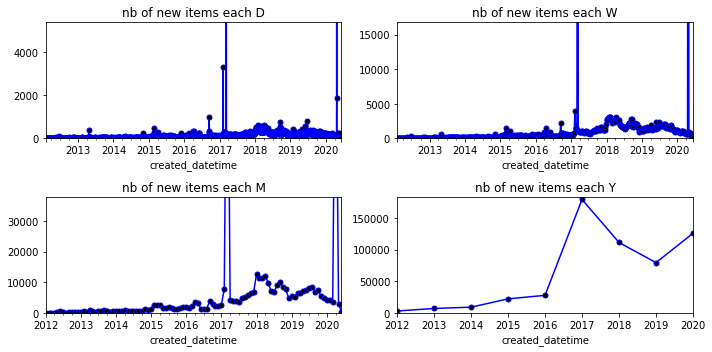

In [25]:
# Plotting number of new items through time

fig = plt.figure(figsize=(10,5))
for i,per in enumerate(['D', 'W', 'M', 'Y'],1):
    ax = fig.add_subplot(2,2,i)
    t_ser = df.groupby(pd.Grouper(key='created_datetime', freq=per)).size()
    t_ser.plot(ax=ax, ms=5, marker='o', mfc='k', color='b', ls='-')
    ax.set(ylim=(0,np.mean(t_ser)+2*np.std(t_ser)))
    ax.set_title("nb of new items each "+per)
fig.tight_layout()
# plt.savefig(os.getcwd()+'/FIG/'+'A_2_1_new_items_thr_time.png', dpi=400);
plt.show()

We see that the rate of new entries per unit of time is globally increasing. However we notice that:
- there has been several times addition of huge amounts of data in 2017 and in 2020
- the rate of new products tend to decrease if we except the occasional addition of large amounts of data.

### 2.2 Proportion of categories through time

#### pnns1 categories

Let's see now is all categories are evenly represented among new products through time. We'll plot the proportion of new products in each categoriy of 'pnns1' (mean aggregation by 'months').

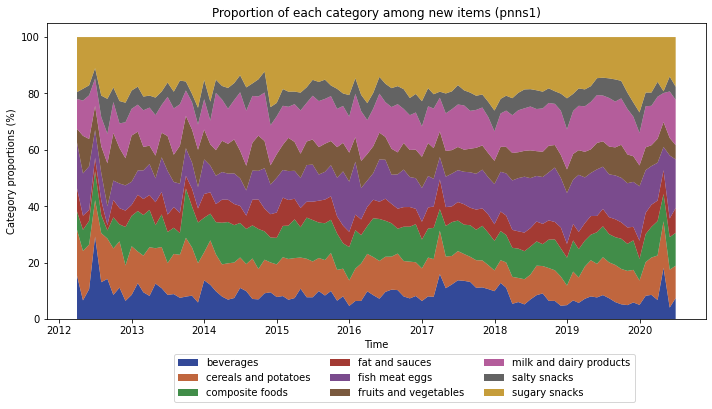

In [38]:
# Plotting proportion of pnns1 among newly entered items

pnns1_n_item_prop = plot_cat_prop_thr_time('pnns1')
plt.savefig(os.getcwd()+'/FIG/'+'A_2_2_prop_cat_n_items_pnns1_thr_time.png',
            dpi=400);
plt.show()

A first glance at the graph indicate that the proportion of all categories seem globally stable through time.

Let's check with a regression:

In [0]:
# calculating regression for the proportion on new items
# for each pnns1 category through time

reg_pnns1_prop = mult_reg_thr_time(pnns1_n_item_prop)

In [28]:
reg_pnns1_prop

,beverages,cereals and potatoes,composite foods,fat and sauces,fish meat eggs,fruits and vegetables,milk and dairy products,salty snacks,sugary snacks
coef,-0.001216,-0.001380,-0.000240,0.000167,0.002462,-0.000940,0.001021,5.331904e-07,0.000125
intercept,10.841088,14.416773,11.349082,6.424991,9.132722,11.020893,12.309785,5.883805e+00,18.620860
mean,9.008537,12.337235,10.987725,6.676444,12.842254,9.604873,13.848444,5.884608e+00,18.809880


For all categories, the intercept coefficient is fairly close to the mean value through time. That seem to indicate the proportion is stationary.

Let's check with proper stationary tests (Augmented Dickey-Fuller unit root test, and Kwiatkowski-Phillips-Schmidt-Shin test).

In [29]:
reg_pnns1_prop = mult_test_station(pnns1_n_item_prop, reg_pnns1_prop,
                                    print_opt=True)

oooo--beverages--oooo
--- Kwiatkowski---
stat=0.500, p=0.042
prob. stationary
--- Aug. Dickey-Fuller ---
 stat.: -4.772930
p-value: 0.000061
prob. stationary

oooo--cereals and potatoes--oooo
--- Kwiatkowski---
stat=0.844, p=0.010
prob. stationary
--- Aug. Dickey-Fuller ---
 stat.: -5.108840
p-value: 0.000013
prob. stationary

oooo--composite foods--oooo
--- Kwiatkowski---
stat=0.296, p=0.100
prob. not stationary
--- Aug. Dickey-Fuller ---
 stat.: -6.865068
p-value: 0.000000
prob. stationary

oooo--fat and sauces--oooo
--- Kwiatkowski---
stat=0.194, p=0.100
prob. not stationary
--- Aug. Dickey-Fuller ---
 stat.: -6.092101
p-value: 0.000000
prob. stationary

oooo--fish meat eggs--oooo
--- Kwiatkowski---
stat=0.735, p=0.010
prob. stationary
--- Aug. Dickey-Fuller ---
 stat.: -2.073365
p-value: 0.255359
prob. not stationary

oooo--fruits and vegetables--oooo
--- Kwiatkowski---
stat=0.983, p=0.010
prob. stationary
--- Aug. Dickey-Fuller ---
 stat.: -6.142139
p-value: 0.000000
prob. station

The stationary tests are not unanimous, however we can see on the summary table below that at least one of the two tests each time gives positive outcome, (i.e. proportion is stationary), as could be expected from coeffients of the linear regression.

In [30]:
reg_pnns1_prop

,beverages,cereals and potatoes,composite foods,fat and sauces,fish meat eggs,fruits and vegetables,milk and dairy products,salty snacks,sugary snacks
coef,-0.00121632,-0.00138025,-0.000239843,0.000166897,0.00246212,-0.000939853,0.00102125,5.3319e-07,0.000125458
intercept,10.8411,14.4168,11.3491,6.42499,9.13272,11.0209,12.3098,5.8838,18.6209
mean,9.00854,12.3372,10.9877,6.67644,12.8423,9.60487,13.8484,5.88461,18.8099
Kwiatkowski,"(0.0418, 'True')","(0.01, 'True')","(0.1, 'False')","(0.1, 'False')","(0.0103, 'True')","(0.01, 'True')","(0.0413, 'True')","(0.1, 'False')","(0.1, 'False')"
Aug. Dickey-Fuller,"(0.0001, 'True')","(0.0, 'True')","(0.0, 'True')","(0.0, 'True')","(0.2554, 'False')","(0.0, 'True')","(0.0, 'True')","(0.0, 'True')","(0.0, 'True')"


#### nutrigrade

We can do the same analysis with nutrigrade groups:

,a,b,c,d,e
coef,-0.00333657,-0.000655945,0.000378853,0.00290927,0.000704399
intercept,22.2344,15.3077,21.0022,24.1112,17.3445
mean,17.2074,14.3194,21.573,28.4944,18.4058
Kwiatkowski,"(0.01, 'True')","(0.0198, 'True')","(0.1, 'False')","(0.01, 'True')","(0.1, 'False')"
Aug. Dickey-Fuller,"(0.5161, 'False')","(0.0, 'True')","(0.0, 'True')","(0.5562, 'False')","(0.0, 'True')"


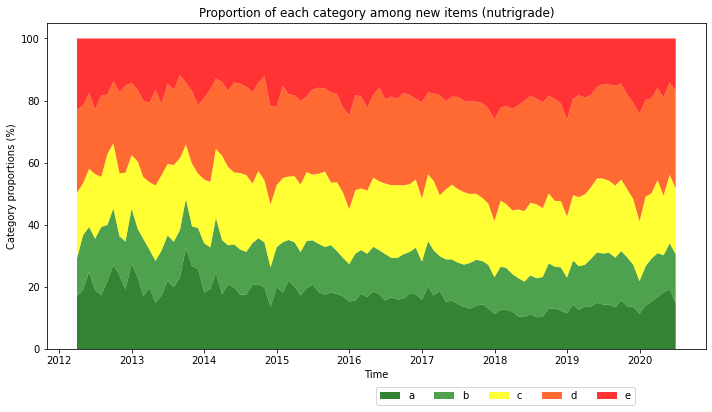

In [31]:
# plotting graph, calculating regression and testing for stationarity

nutri_pal = ['darkgreen', 'forestgreen', 'yellow', 'orangered', 'red']

nutrig_n_item_prop = plot_cat_prop_thr_time('nutrigrade', palette=nutri_pal,
                                            ncol=5)
reg_nutrig_prop = mult_reg_thr_time(nutrig_n_item_prop)
reg_nutrig_prop = mult_test_station(nutrig_n_item_prop, reg_nutrig_prop,
                                    print_opt=False)
reg_nutrig_prop

It seems that the ratio of A nutrigrade products has decreased from 2012 to mi-2018, and increased again up to now, whereas the ratio of nutrigrade D products increased progressively.  

Let's now see if we can point out changes in some of the main quantitative features. We'll plot a rolling mean of features through time.

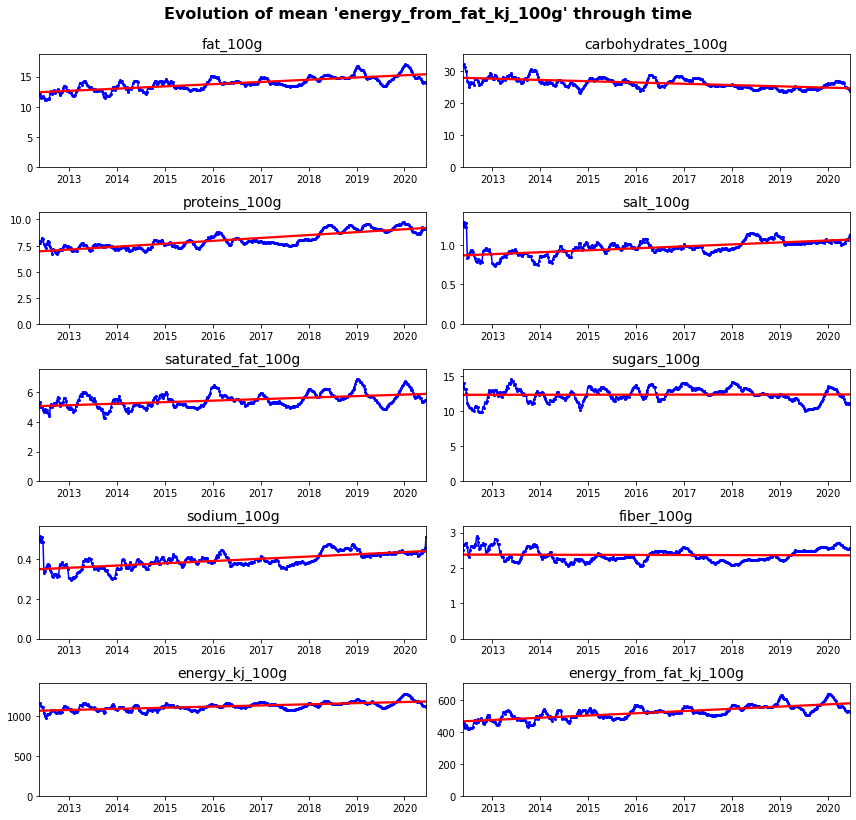

In [53]:
# Plotting evolution of the mean of main quantitative features
# in newly entered items through time (aggregated on weeks )

col_100g = ['fat_100g', 'carbohydrates_100g', 'proteins_100g', 'salt_100g',
            'saturated_fat_100g', 'sugars_100g', 'sodium_100g', 'fiber_100g',
            'energy_kj_100g', 'energy_from_fat_kj_100g']
df_100g_thr_time = df.set_index('created_datetime').sort_index()[col_100g]
df_100g_thr_time = df_100g_thr_time.resample('W').mean()
dates = mdates.date2num(df_100g_thr_time.index)

fig = plt.figure(figsize=(12,14))

for i, c in enumerate(col_100g,1):
    ax = fig.add_subplot(6,2,i)
    y_roll = df_100g_thr_time[c].rolling(10).mean().values
    plt.plot_date(dates, y_roll, ls='-', markersize=2, lw=1.5, color='b')
    sns.regplot(dates, y_roll, marker='None', color='r', ax= ax)
    ax.set(ylim=(0,np.nanmax(y_roll)*1.1))
    ax.set_title(c, fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
fig.suptitle("Evolution of mean '"+c+"' through time",
             fontweight='bold', fontsize=16)
# plt.savefig(os.getcwd()+'/FIG/'+'A_2_0_evol_100g_thr_time.png', dpi=400);
plt.show()

In [33]:
# Regression coefficients and result of stationary tests on values per 100g

reg_df_100g_thr_time = mult_reg_thr_time(df_100g_thr_time)
reg_df_100g_thr_time = mult_test_station(df_100g_thr_time, reg_df_100g_thr_time,
                                    print_opt=False)
display(reg_df_100g_thr_time)

,fat_100g,carbohydrates_100g,proteins_100g,salt_100g,saturated_fat_100g,sugars_100g,sodium_100g,fiber_100g,energy_kj_100g,energy_from_fat_kj_100g
coef,0.000915111,-0.00133119,0.000670781,5.35069e-05,0.000215134,-0.000182465,2.74203e-05,1.86647e-05,0.0296137,0.0344594
intercept,12.4924,28.3992,7.07232,0.892886,5.15702,12.7051,0.357151,2.32977,1079.63,470.414
mean,13.8983,26.354,8.10288,0.975092,5.48755,12.4247,0.399278,2.35845,1125.13,523.355
Kwiatkowski,"(0.01, 'True')","(0.01, 'True')","(0.01, 'True')","(0.01, 'True')","(0.01, 'True')","(0.1, 'False')","(0.01, 'True')","(0.1, 'False')","(0.01, 'True')","(0.01, 'True')"
Aug. Dickey-Fuller,"(0.0079, 'True')","(0.0234, 'True')","(0.6593, 'False')","(0.0, 'True')","(0.0, 'True')","(0.0, 'True')","(0.002, 'True')","(0.0281, 'True')","(0.0071, 'True')","(0.0079, 'True')"


Fats, salt and proteins seem to slowly increase in newly entered 

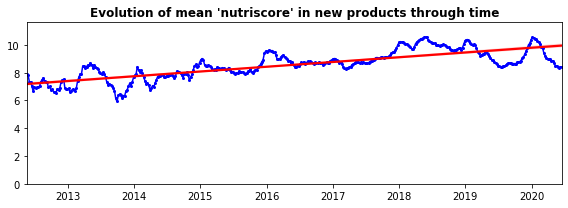

--- Kwiatkowski---
stat=2.395, p=0.010
prob. stationary
--- Aug. Dickey-Fuller ---
 stat.: -1.879318
p-value: 0.341852
prob. not stationary



In [34]:
# Plotting evolution of main quantitative features through time

ser_nut = df.set_index('created_datetime').sort_index()['nutriscore']
ser_nut = ser_nut.resample('W').mean()
dates = mdates.date2num(df_100g_thr_time.index)

fig = plt.figure(figsize=(8,3))
y_roll = ser_nut.rolling(10).mean().values
plt.plot_date(dates, y_roll, ls='-', markersize=2, lw=1.5, color='b')
ax = plt.gca()
sns.regplot(dates, y_roll, marker='None', color='r', ax= ax)
ax.set(ylim=(0,np.nanmax(y_roll)*1.1))
ax.set_title("Evolution of mean 'nutriscore' in new products through time", fontweight='bold')
fig.tight_layout()
# plt.savefig(os.getcwd()+'/FIG/'+'A_2_0_evol_100g_thr_time.png', dpi=400);
plt.show()

# Regression coefficients and result of stationary tests on 'nutriscore'

stationary_tests(y_roll, print_opt=True);

## 3 Bivariate analysis

### 3.1 Quantitative vs. categorical data

#### Food categories

Let's have a look on the dispersion of quantitative values for the main categories of food. We'll use pnns1 categories at first.

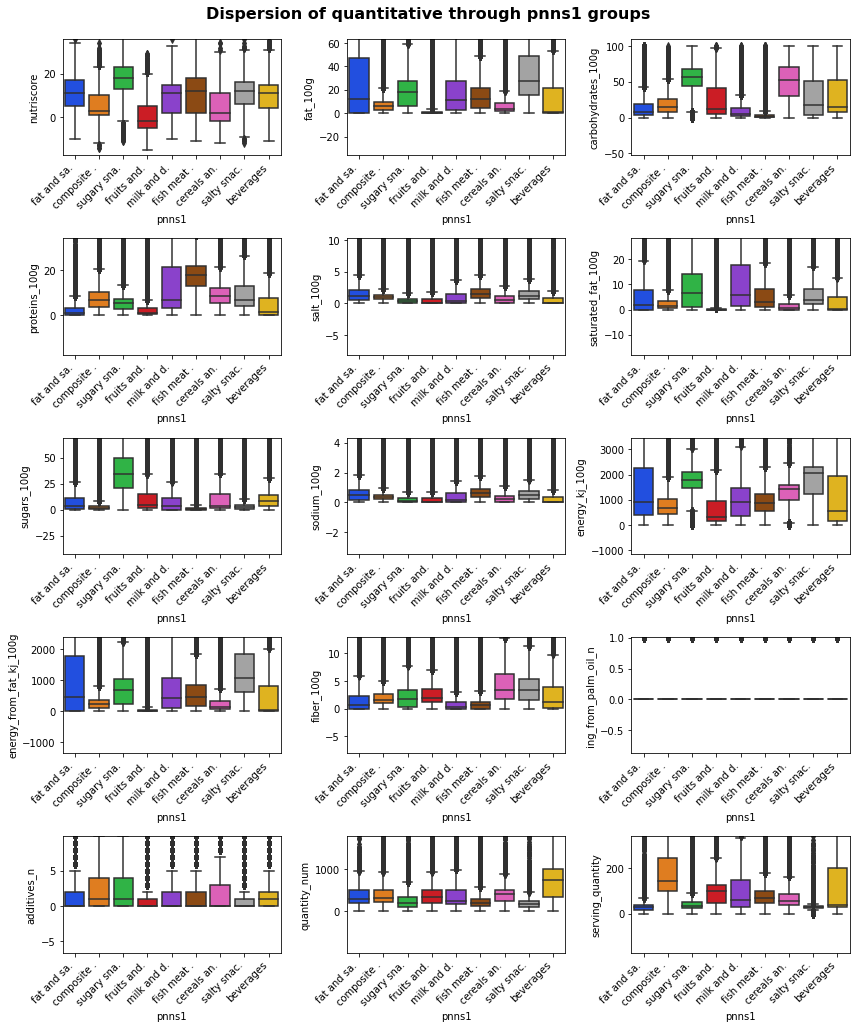

In [59]:
# Plotting boxplots of each quantitative data for each pnns1 categories 

pnns1_pal = sns.color_palette(palette='bright')

fig = plt.figure(figsize=(12,15))
with sns.color_palette(pnns1_pal):
    for i, c in enumerate(quant_cols,1):
        ax = fig.add_subplot(5,3,i)
        sns.boxplot(data=df, x='pnns1', y=c, ax=ax)# order=list('abcde')
        min = df[c].mean()-3*df[c].std()
        max = df[c].mean()+3*df[c].std()
        plt.ylim(min,max)
        labels = [item.get_text() for item in ax.get_xticklabels()]
        short_labels = [s[0:10]+'.' if len(s)>10 else s for s in labels]
        ax.axes.set_xticklabels(short_labels)
        plt.xticks(rotation=45, ha='right')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.suptitle('Dispersion of quantitative through pnns1 groups', fontsize=16,
             fontweight='bold')
# plt.savefig(os.getcwd()+'/FIG/'+'A_3_1_pnns1_boxplots.png', dpi=400);
plt.show()

After seeing these boxplots, we can hypothesize that pnns1 categories are not homogeneous through any quantitative value.

Lets' check with an ANOVA if this discrepancies in the mean value we observe are statistically significant.

In [0]:
# ANOVA on one quantitative feature

# - > at least one of the groups has a significantly different mean from the others.

In [0]:
# ANOVA two by two for one quantitative features

# - > some categories have the same repartition for some features, others not.

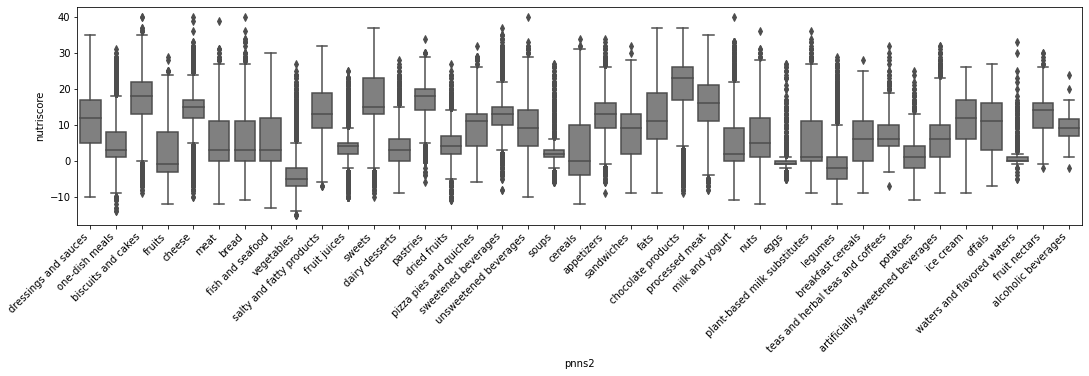

In [0]:


sns.boxplot(data=df, x='pnns2', y='nutriscore', color='grey')
plt.gcf().set_size_inches(18,4)
plt.xticks(rotation=45, ha='right');

In [0]:
## Test de normalité à faire dans les sous-groupes

In [0]:
data1

In [0]:
# Analysis of Variance Test (ANOVA)

from scipy.stats import f_oneway
from scipy.stats import friedmanchisquare

gb = df.groupby('pnns2')
# data1 = df.loc[gb.groups['meat'], 'nutriscore']
# data2 = df.loc[gb.groups['fish and seafood'], 'nutriscore']
# data3 = df.loc[gb.groups['bread'], 'nutriscore']

cat = df['nutrigrade'].unique()
tab=[]
for c in cat:
    tab.append(df.loc[df['nutrigrade']==c, 'nutriscore'])

stat, p = f_oneway(*tab)
print('---'+" ANOVA")
print('stat=%.3f, p=%3.8f' % (stat, p))
print('Probably same distribution\n') if p > 0.05 else print('Probably not the same distribution\n')

# Parametric statistical hypothesis test
# from sklearn.preprocessing import LabelEncoder
# ser = LabelEncoder().fit_transform(df['pnns2'].values)
# stat, p = f_oneway(ser, df['nutriscore'])
 
# print('---'+" ANOVA")
# print('stat=%.3f, p=%3.8f' % (stat, p))
# print('Probably same distribution\n') if p > 0.05 else print('Probably not the same distribution\n')

# # Non-Parametric statistical hypothesis test
# stat, p = friedmanchisquare(*tab)
# print('---'+"Friedman ANOVA")
# print('stat=%.3f, p=%.3f' % (stat, p))
# print('Probably same distribution\n') if p > 0.05 else print('Probably not the same distribution\n')

In [0]:
import scipy.stats as st
t, p = st.ttest_ind(data1, data2, equal_var=True)
print('\nt-test: p-value = ',p)

In [0]:
# # Example of the Mann-Whitney U Test
# from scipy.stats import mannwhitneyu
# stat, p = mannwhitneyu(data1, data2)
# print('---'+" U-test (Mann-Whitney)")
# print('stat=%.3f, p=%.3f' % (stat, p))
# print('Probably same distribution\n') if p > 0.05 else print('Probably not the same distribution\n')

# # Example of the Wilcoxon Signed-Rank Test
# from scipy.stats import wilcoxon
# stat, p = wilcoxon(data1, data2)
# print('---'+" Signed-rank (Wilcoxon)")
# print('stat=%.3f, p=%.3f' % (stat, p))
# print('Probably same distribution\n') if p > 0.05 else print('Probably not the same distribution\n')

# # Example of the Kruskal-Wallis H Test
# from scipy.stats import kruskal
# stat, p = kruskal(data1, data2)
# print('---'+" H-test (Kruskal-Wallis)")
# print('stat=%.3f, p=%.3f' % (stat, p))
# print('Probably same distribution\n') if p > 0.05 else print('Probably not the same distribution\n')
    
# Example of the Friedman Test
from scipy.stats import friedmanchisquare
stat, p = friedmanchisquare(data1, data2, data3)
print('---'+"Friedman ANOVA")
print('stat=%.3f, p=%.3f' % (stat, p))
print('Probably same distribution\n') if p > 0.05 else print('Probably not the same distribution\n')

In [0]:
# with pd.option_context("display.float_format", '{:,.2f}'.format):
#     display(df.groupby(['pnns1'])['nutriscore'].agg([np.median, np.mean, np.std]))

#### nutrigrade

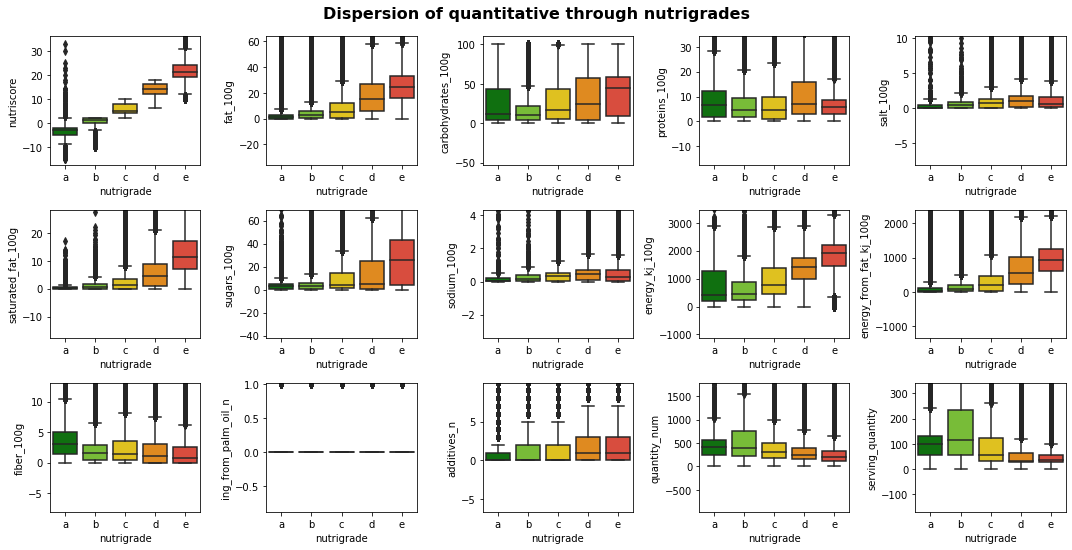

In [64]:
# nutriscore

nutri_pal = ['#008000', '#78D222', '#FFD700', '#FF8D00' , '#F23824']

fig = plt.figure(figsize=(15,8))
with sns.color_palette(nutri_pal):
    for i, c in enumerate(quant_cols,1):
        ax = fig.add_subplot(3,5,i)
        sns.boxplot(data=df, x='nutrigrade', y=c, order=list('abcde'), ax=ax)
        min = df[c].mean()-3*df[c].std()
        max = df[c].mean()+3*df[c].std()
        plt.ylim(min,max)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Dispersion of quantitative data through nutrigrades', fontsize=16,
             fontweight='bold')
# plt.savefig(os.getcwd()+'/FIG/'+'A_3_nutrigrade_boxplots.png', dpi=400);
plt.show()

### Pair plots

In [0]:
# Function to show scatter plot:
def bivar_show(L):
    plt.scatter(df[L[0]],
                df[L[1]], 
                marker='.',
                alpha=0.1,
                color = 'green')
    plt.xlabel(L[0])
    plt.ylabel(L[1])
    plt.title('Pearson coeff: %.2f'%df[L].corr().iloc[0,1])

plt.subplots(figsize=(10,5))

# Salt vs Sodium (obviously as Salt is parent category)
plt.subplot(2,3,1)
L1 = ['salt_100g', 'sodium_100g']
bivar_show(L1)

# Fat VS Saturated_fat: (obviously as Fat is parent category)
plt.subplot(2,3,2)
L2 = ['saturated_fat_100g', 'fat_100g']
bivar_show(L2)

# Carbohydrates VS Sugars: (obviously as Carbohydrates is parent category)
plt.subplot(2,3,3)
L3 = ['sugars_100g','carbohydrates_100g']
bivar_show(L3)

# Fat VS Saturated_fat: (obviously as Fat is parent category)
plt.subplot(2,3,4)
L4 = ['energy_100g', 'fat_100g']
bivar_show(L4)

# Fat VS Saturated_fat: (obviously as Fat is parent category)
plt.subplot(2,3,5)
L5 = ['energy_100g', 'saturated_fat_100g']
bivar_show(L5)

# Proteins VS Sugars:
plt.subplot(2,3,6)
L6 = ['proteins_100g', 'sugars_100g']
bivar_show(L6)

plt.tight_layout()
plt.show()

In [0]:
# Scatterplot matrix (too much data -> on a sample)
cols = ['fat_100g', 'nutriscore','proteins_100g','carbohydrates_100g']
df_sample = df.sample(1000)

grid = sns.PairGrid(data=df_sample,
                    vars=cols, height=2.5)
grid = grid.map_upper(plt.scatter, marker='o', edgecolors='darkred',
                      alpha=0.5, color='red', s=20)
# grid = grid.map_upper(testcorr)
grid = grid.map_diag(plt.hist, bins = 20, color = 'darkred', edgecolor = 'k')
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')

# plt.savefig(os.getcwd()+'/FIG/'+'A_2_7_pairplot_grid.png', dpi=400);
plt.show()

### Linear correlation

In [0]:
def plot_heatmap(corr, title, figsize=(8,4), vmin=-1, vmax=1, center=0,
                 palette = sns.color_palette("coolwarm", 20), rect=False,
                 fmt='.2f'):
    fig, ax = plt.subplots(figsize=figsize)
    if rect==True:
        mask=None
    else:
        mask = np.zeros_like(corr, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
    palette = palette
    ax = sns.heatmap(corr, mask=mask, cmap=palette, vmin=vmin, vmax=vmax,
                     center=center, annot=True, annot_kws={"size": 10},fmt=fmt,
                     square=False, linewidths=.5, linecolor = 'white',
                     cbar_kws={"shrink": .9, 'label': None},
                     xticklabels= corr.columns, yticklabels = corr.index)
    ax.tick_params(labelsize=10,top=False, bottom=True,
                labeltop=False, labelbottom=True)
    ax.collections[0].colorbar.ax.tick_params(labelsize=10)
    plt.setp(ax.get_xticklabels(), rotation=25, ha="right",rotation_mode="anchor")
    ax.set_title(title, fontweight='bold', fontsize=12)
    plt.show()

In [0]:
# Linear correlation (Pearson)

cols = quant_cols
pears_corr = df[cols].corr()
plot_heatmap(pears_corr, rect=False, title="Pearson correlation", figsize=(12,5))
# plt.savefig(os.getcwd()+'/FIG/'+'A_2_1_pearson_corr.png', dpi=400);
plt.show()

Some of the correlations are quite obvious, as for example:
- fat -> energy
- sugars -> carbohydrates
- fat, saturated, fat, sugars, energy -> nutriscore
- nutriscore -> nutrigrade
More suprisingly :
- more fibers can be found in high energy products

As we know from its formula, nutriscore:
- increases with energy, saturated fat, sugar and salt
- decreases with fibers, proteins and fruits and vegetable content

However, which is more interesting is that the value of correlation coefficient indicates that in the case of most of the actual products, the main factors that are correlated with nutriscore are (decreasing order):
- fat, energy, saturated fat, carbohydrates, sugar
- whereas sodium is very weakly correlated to a high nutriscore.

__=> Food industry should focus primarily on decreasing fat to lower the nutriscore of their products__.


#### Correlation tests

We'll test for linear correlation (Pearson) and for monotonic relationship (Spearman, Kendall).

In [0]:
from scipy.stats import pearsonr, spearmanr, kendalltau

def correlation_tests(data1, data2, print_opt=False):
    df_res = pd.DataFrame([])
    # data1_notna = data1[data1.notna()]
    # Pearson, Spearman, Kendall
    for f_name, func in zip(['Pearson', 'Spearman', 'Kendall'],[pearsonr, spearmanr, kendalltau]):
        stat, p = func(data1, data2)
        df_res.loc[f_name,'stat'] = stat
        df_res.loc[f_name,'p_value'] = p
        if print_opt: print('---'+f_name)
        if print_opt: print('stat=%.3f, p=%.3f' % (stat, p))
        if print_opt:print('Probably independent') if p > 0.05 else print('Probably dependent')
    return df_res

In [0]:
# Correlation test

test_couples = [('fat_100g','nutriscore'), ('carbohydrates_100g','nutriscore'),
                ('fat_100g','nutriscore'), ('energy_kj_100g','nutriscore'),
                ('fiber_100g','nutriscore'), ('energy_kj_100g','fiber_100g'),
                ('fat_100g','fiber_100g'), ('fat_100g','fiber_100g')]

for tup in test_couples:
    print('------'+str(tup).upper()+'-----')
    c1, c2 = tup
    display(correlation_tests(df[c1], df[c2], print_opt=False))

### Non-linear correlation

Now we'll test for non linear correlation using  Predictive Power Score (decision tree based).

In [0]:
# Predictive Power Score (ppscore)

cols = quant_cols + qual_cols

pps_corr = pps.matrix(df[cols])
plot_heatmap(pps_corr, title="Predictive Score", 
             vmin=0, center=0.5, figsize=(15,8), rect=True,
             palette=sns.color_palette("inferno", 20))
# plt.savefig(os.getcwd()+'/FIG/'+'A_2_3_ppscore_corr.png', dpi=400);
plt.show()

It seems that categories have a strong relation to most of the nutritional values.

countries as well seem to have a strong relationship to nutritional values. 

### Contingency table and Chi-squared

In [0]:
## Creating table of contingency

data_crosstab = pd.crosstab(df['pnns1'], 
                            df['nutrigrade'],  
                               margins = True)
# display(data_crosstab)
plot_heatmap(data_crosstab,"Contingency table ('pnns1' vs. 'nutrigrade')",
             vmin=0, vmax=50000,
             palette=sns.color_palette("coolwarm", 20),figsize=(8,4),rect=True)

In [0]:
# Chi-Squared Test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(data_crosstab)
print('---'+"Chi-squared")
print('stat=%.3f, p=%.8f' % (stat, p))
print('Probably independent') if p > 0.05 else print('Probably dependent')

## 4 Multivariable analysis

### 4.1 PCA (Principal Component Analysis)

In [0]:
from P3_Analysis_functions import *

In [68]:
##### Principal Component Analysis #####

np.set_printoptions(formatter={'float': '{: 6.2f}'.format})

## --Feature and index (dropna) selection for PCA
pca_cols = cols_1_Q + cols_2_Q + cols_3_Q
pca_cols = [c for c in pca_cols if c!='nutriscore']
id_code = df[pca_cols].dropna(how='any').index
X = df.loc[id_code, pca_cols].values

## --Data standardisation
print('-----standardisation-----')
X_sc = StandardScaler().fit_transform(X)
print(X_sc)

-----standardisation-----
[[ -0.34   0.02  -0.37 ...  -0.71  -0.22  -0.60]
 [ -0.81  -0.86  -0.86 ...  -0.04  -0.22  -0.60]
 [  0.50  -0.05  -0.43 ...   0.55  -0.22  -0.60]
 ...
 [  0.39   0.09  -0.11 ...  -0.46  -0.22  -0.60]
 [ -0.37   0.24  -0.66 ...  -0.04  -0.22   0.49]
 [ -0.53  -1.05   1.53 ...   0.50  -0.22  -0.60]]


In [69]:
## Principal components calculation

n_comp = 10
pca = PCA(n_components=n_comp).fit(X_sc)

# coefficients of principal components (original features)
pca_df = pd.DataFrame(pca.components_,
                      index=['PC'+str(i+1) for i in range(n_comp)],
                      columns=pca_cols).T
plot_heatmap(pca_df,'Principal components', vmin=-1, vmax=1, center=0,
             palette=sns.color_palette("coolwarm", 20),figsize=(8,4),rect=True)
# plt.savefig(os.getcwd()+'/FIG/'+'A_3_1_principal_components.png', dpi=400);
plt.show()

NameError: ignored

In [0]:
# Explained variance ratio

exp_var_rat = pca.explained_variance_ratio_
plt.bar(x=pca_df.columns,height=exp_var_rat, color='grey')
ax1 = plt.gca()
ax1.set(ylim=(0,0.4))
ax2 = ax1.twinx()
ax2.plot(exp_var_rat.cumsum(), 'ro-')
ax2.set(ylim=(0,1.1))
ax1.set_ylabel('explained var. rat.')
ax2.set_ylabel('cumulative explained var. rat.')
for i, p in enumerate(ax1.patches):
    ax1.text( p.get_width()/5 + p.get_x(), p.get_height()+ p.get_y()+0.01,
             '{:.0f}%'.format(exp_var_rat[i]*100),
                fontsize=8, color='k')
plt.gcf().set_size_inches(8,3)
plt.title('Scree plot', fontweight='bold')
# plt.savefig(os.getcwd()+'/FIG/'+'A_3_1_scree_plot.png', dpi=400);
plt.show()

In [0]:
## KMeans Clustering

n_clust = 9
km = KMeans(n_clusters=n_clust).fit(X_sc)
clustK = km.labels_
df.loc[id_code, 'cluster_Kmeans'] = clustK

In [0]:
# Hierarchical Clustering

# Z = linkage(X_sc, 'ward')
# print(Z[0:15])
# plt.figure(figsize=(16,10))
# dendrogram(Z, labels = df.index, orientation = "right", count_sort='descending')
# plt.show()

# n_clust = 6
# clustH = fcluster(Z, n_clust, criterion='maxclust')
# df['cluster_HierClust'] = clustH
# clustH

In [0]:

# from mlxtend.plotting import plot_pca_correlation_graph

from mlxtend import plotting
plotting.plot_pca_correlation_graph

# A FAIRE
figure, correlation_matrix = plotting.plot_pca_correlation_graph(X_norm, 
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)

In [0]:
# Correlation circle

display_circles(pca.components_, n_comp, pca, [(0,1),(2,3),(4,5)],
                labels = np.array(pca_cols), width=20,  n_cols=3)
# plt.savefig(os.getcwd()+'/FIG/'+'A_3_1_correlation_circle.png', dpi=400);
plt.show()

In [0]:
# Plotting a sample of values projected on first factorial planes

id_code_samp = pd.Series(id_code).sample(200)
X_samp = df.loc[id_code_samp, pca_cols].values
X_sc_samp = StandardScaler().fit_transform(X_samp)

display_factorial_planes(pca.transform(X_sc_samp), n_comp, pca, [(0,1),(2,3),(4,5)],
                         n_cols=3, labels=np.array(id_code_samp),
                         illus_var= df.loc[id_code_samp, 'nutrigrade'],
                         lab_on=False, alpha=0.6)

In [0]:
display_factorial_planes(pca.transform(X_sc_samp), n_comp, pca, [(0,1),(2,3),(4,5)],
                         n_cols=3, labels=np.array(id_code_samp),
                         illus_var= df.loc[id_code_samp, 'pnns1'],
                         lab_on=False, alpha=0.6)

In [70]:
import mlxtend
mlxtend.__version__

'0.17.2'

In [71]:
display_factorial_planes(pca.transform(X_sc_samp), n_comp, pca, [(0,1),(2,3),(4,5)],
                         n_cols=3, labels=np.array(id_code_samp),
                         illus_var= df.loc[id_code_samp, 'cluster_Kmeans'],
                         lab_on=False, alpha=0.6)

NameError: ignored

In [0]:
# Contingency table showing cluster vs. pnns1 categories

data_crosstab = pd.crosstab(df['pnns1'], 
                            df['cluster_Kmeans'],  
                               margins = True)
# display(data_crosstab)
# Chi-Squared Test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(data_crosstab)
print('---'+"Chi-squared")
print('stat=%.3f, p=%.3f' % (stat, p))
print('Probably independent') if p > 0.05 else print('Probably dependent')

pca_df = pd.DataFrame(pca.components_,
                      index=['PC'+str(i+1) for i in range(n_comp)],
                      columns=pca_cols).T
plot_heatmap(data_crosstab,"Contingency table ('clusters' vs. 'pnns1')",
             vmin=0, vmax=45000,figsize=(10,4),rect=True, fmt='.0f',
             palette=sns.color_palette("coolwarm", 20))
# plt.savefig(os.getcwd()+'/FIG/'+'A_3_1_cont_tabl_clust_pnns1.png', dpi=400);
plt.show()

In [0]:
!pip freeze > requirements_analysis.txt